In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report, 
    confusion_matrix
)
import scipy.sparse as sp
from scipy.sparse import hstack


Step 2: Loading the DataSet

In [33]:
SAMPLE_SIZE = 19797
df = pd.read_csv('tickets.csv', nrows=SAMPLE_SIZE)

Step 3:Problem Statement: "Predict priority (P1, P2, P3, P4) from ticket text."

In [34]:
target_var = 'Priority'

Step 4: Distribution of Target Variable

Distribution of target variable:
Priority
P3    7520
P1    6748
P2    5528
Name: count, dtype: int64


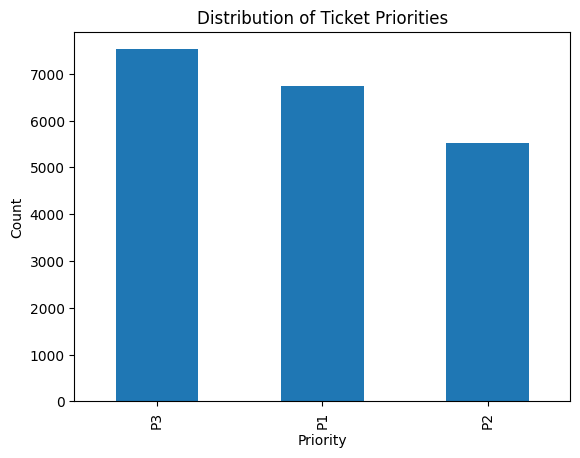

In [35]:
print("Distribution of target variable:")
print(df[target_var].value_counts())

df[target_var].value_counts().plot(kind='bar')
plt.title('Distribution of Ticket Priorities')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()

Step 5: Exploratory Data Analysis (EDA)

In [36]:
print("\nData preview:")
print(df.head())
print("\nChecking Missing Values:")
print(df.isnull().sum())
print("Create Feature: Description Length")
df['description_length'] = df['Ticket_Description'].astype(str).apply(len)


Data preview:
   TicketID                                 Ticket_Description Priority
0    123456  connection issues with assigned address hi fac...       P1
1    123457  cannot access hi cannot access fallowing link ...       P2
2    123458  re address shown valid dear colleagues remarke...       P1
3    123459  sent tuesday critical alert following alert oc...       P2
4    123460  code spelling mistake hello should discover fo...       P2

Checking Missing Values:
TicketID              0
Ticket_Description    0
Priority              0
dtype: int64
Create Feature: Description Length


Feature Engineering
1)Visual EDA
2)Drop Useless Columns
3)Handling missing Values

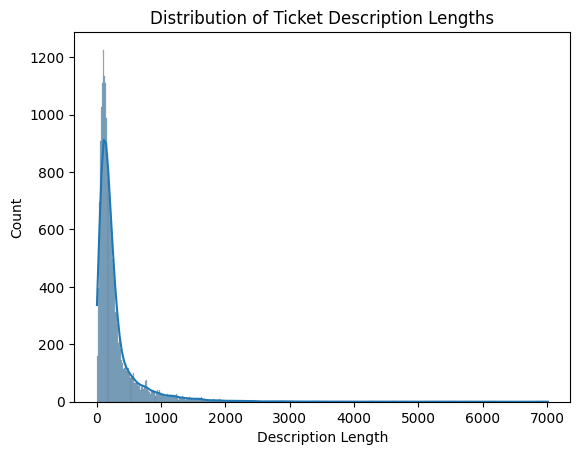

In [ ]:
sns.histplot(df['description_length'], kde=True)
plt.title('Distribution of Ticket Description Lengths')
plt.xlabel('Description Length')
plt.show()
#  We keep 'Ticket_Description', 'description_length', and 'Priority'
if 'TicketID' in df.columns:
    df.drop(['TicketID'], axis=1, inplace=True, errors='ignore')
df.dropna(subset=['Ticket_Description', 'Priority'], inplace=True)



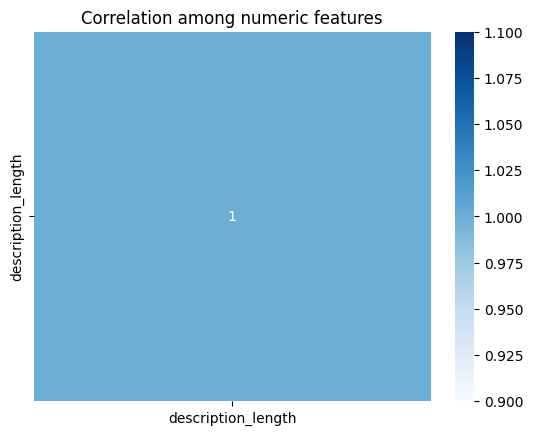

In [38]:
sns.heatmap(df[['description_length']].corr(), annot=True, cmap='Blues')
plt.title("Correlation among numeric features")
plt.show()
